# Principal component analysis

 PCA is a technique where we can reduce the number of features in a dataset without losing any of the information we have.

 eg. if a column has the same value for every row, this column does not provide a lot of information, due to the lack of variance in the values.

 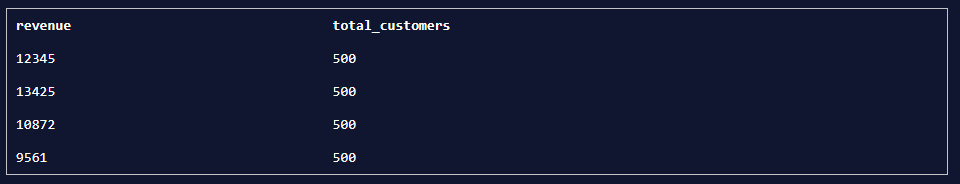

 We are interested in variance. Variance alone is one indicator of the level of information in a dataset, but is not the only factor. To expand on the idea of variance within a dataset, we will look at the Coefficient of Variance, or CV for short. The premise here is that variance must be taken into context with the central tendencies of that dataset. For example, if a dataset has a variance of 5, that will mean very different things if the mean is 2 vs. a dataset with a mean of 100.

## calculate the Coefficient of Variance for each of our columns.

In [18]:
import numpy as np

#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

#apply the functional along an axis of the dataframe
print(df.apply(cv))


NameError: name 'df' is not defined

## The Math Behind PCA

First, we need to isolate a Data Matrix, another name for a dataset. This data matrix holds all of the features and information that we are interested in.

From here, the next step of PCA is to calculate a covariance matrix. Essentially, a covariance matrix is calculating how much a feature changes with changes in every other feature, i.e., we’re looking at the relative variance between any two features.

Luckily, with the pandas package, we can calculate a covariance matrix with the .cov() method.

### Matrix Factorization, Eigenvalues, and Eigenvectors

We now have a matrix of variance values for our features. The next step in PCA revolves around matrix factorization. Without going into too much detail, our goal with matrix factorization is to find a pair of smaller matrices whose product would equal our covariance matrix. Another way of thinking about it: we want to find a smaller matrix that captures the majority of our information.

An important part of this matrix factorization are Eigenvectors. Eigenvectors are vectors (mathematical concepts that have direction and magnitude) that do not change direction when a transformation is applied to them. In the context of data matrices, these eigenvectors give us a direction to “rotate” the dataset in n-dimensional space so we can look at the entire dataset from a simplified perspective. The eigenvalues are related to the relative variation described by each principal component.

sns.pairplot(df) allows us to visualise every pairing on 5x5 plots

Each individual combination of features will have its own correlation and variance, both of which provide valuable information about that relationship. When comparing two features at a time, these relationships are more understandable. If we wanted to, however, look at all of the feature relationships and information at once, it would be very difficult to decipher, as we cannot visualize data in a 5-dimensional space.

By using PCA, however, we can reduce the dimensionality of our dataset into a 2-dimensional dataset, allowing for better visualization. 

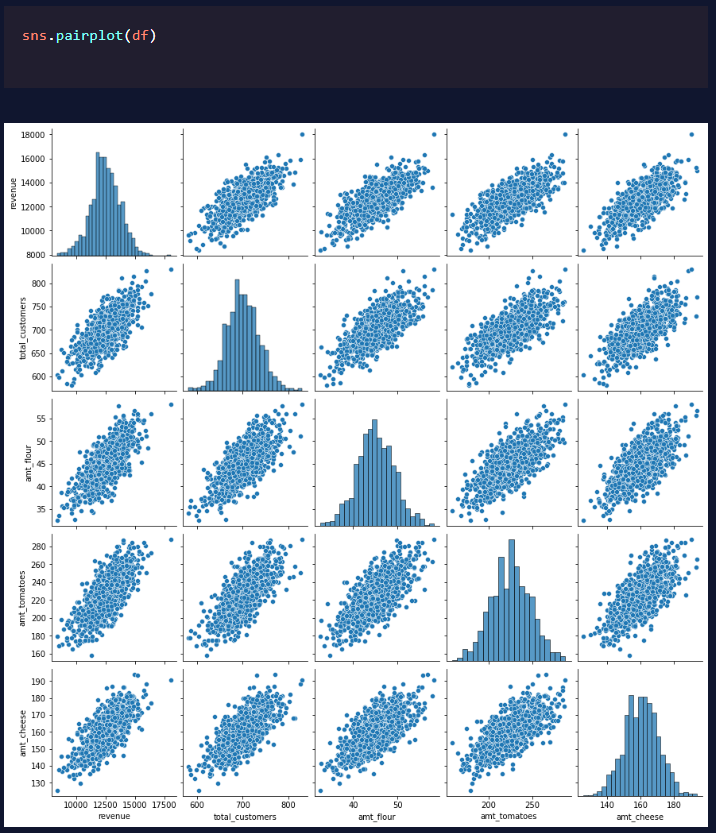

## Why is PCA useful

This two-dimensional dataset can now be an input to a variety of Machine Learning models. For example, we could use this new dataset as part of a forecasting model, or perform linear regression. These techniques would have been much more difficult prior to performing PCA.

PCA is also inherently an unsupervised learning algorithm and can be used to identify clusters in data on its own. Very similar to the popular k-means algorithms, PCA will look at overall similarities between the different features in a dataset. When we set the number of principal components to keep, we are defining the number of similar “rotations” of our dataset, which will act very much like a cluster of their own. Typically, many practitioners will implement PCA as a precursor to other clustering algorithms to augment the accuracy, but it is an interesting application to do clustering with PCA alone!

Another, very powerful, application of PCA is with image processing. Images hold a vast amount of information in each file, and analyzing this information can have very useful applications. Image classification, for example, uses algorithms to detect the subject of an image, or find a particular object within the image. Overall, it can be very costly to process image data, due to the high dimensionality it has. By applying PCA, however, practitioners can reduce the number of features for the image with minimal information loss and continue their processing.

Below are two images from a Fruit and Vegetable Image dataset. The first image is the original image, and the second is the reconstructed image using the calculated eigenvectors after performing PCA. Note that, in this very quick example, there is minimal information loss, meaning that data could be effectively used for analytics.
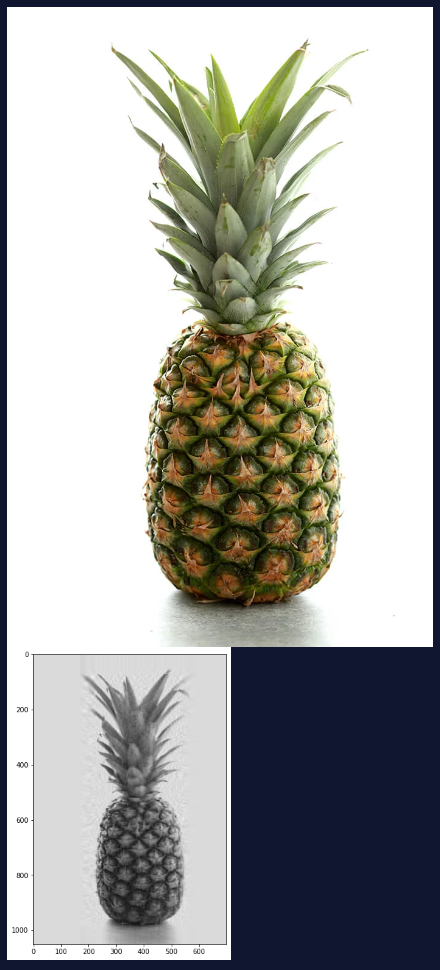



### Summary

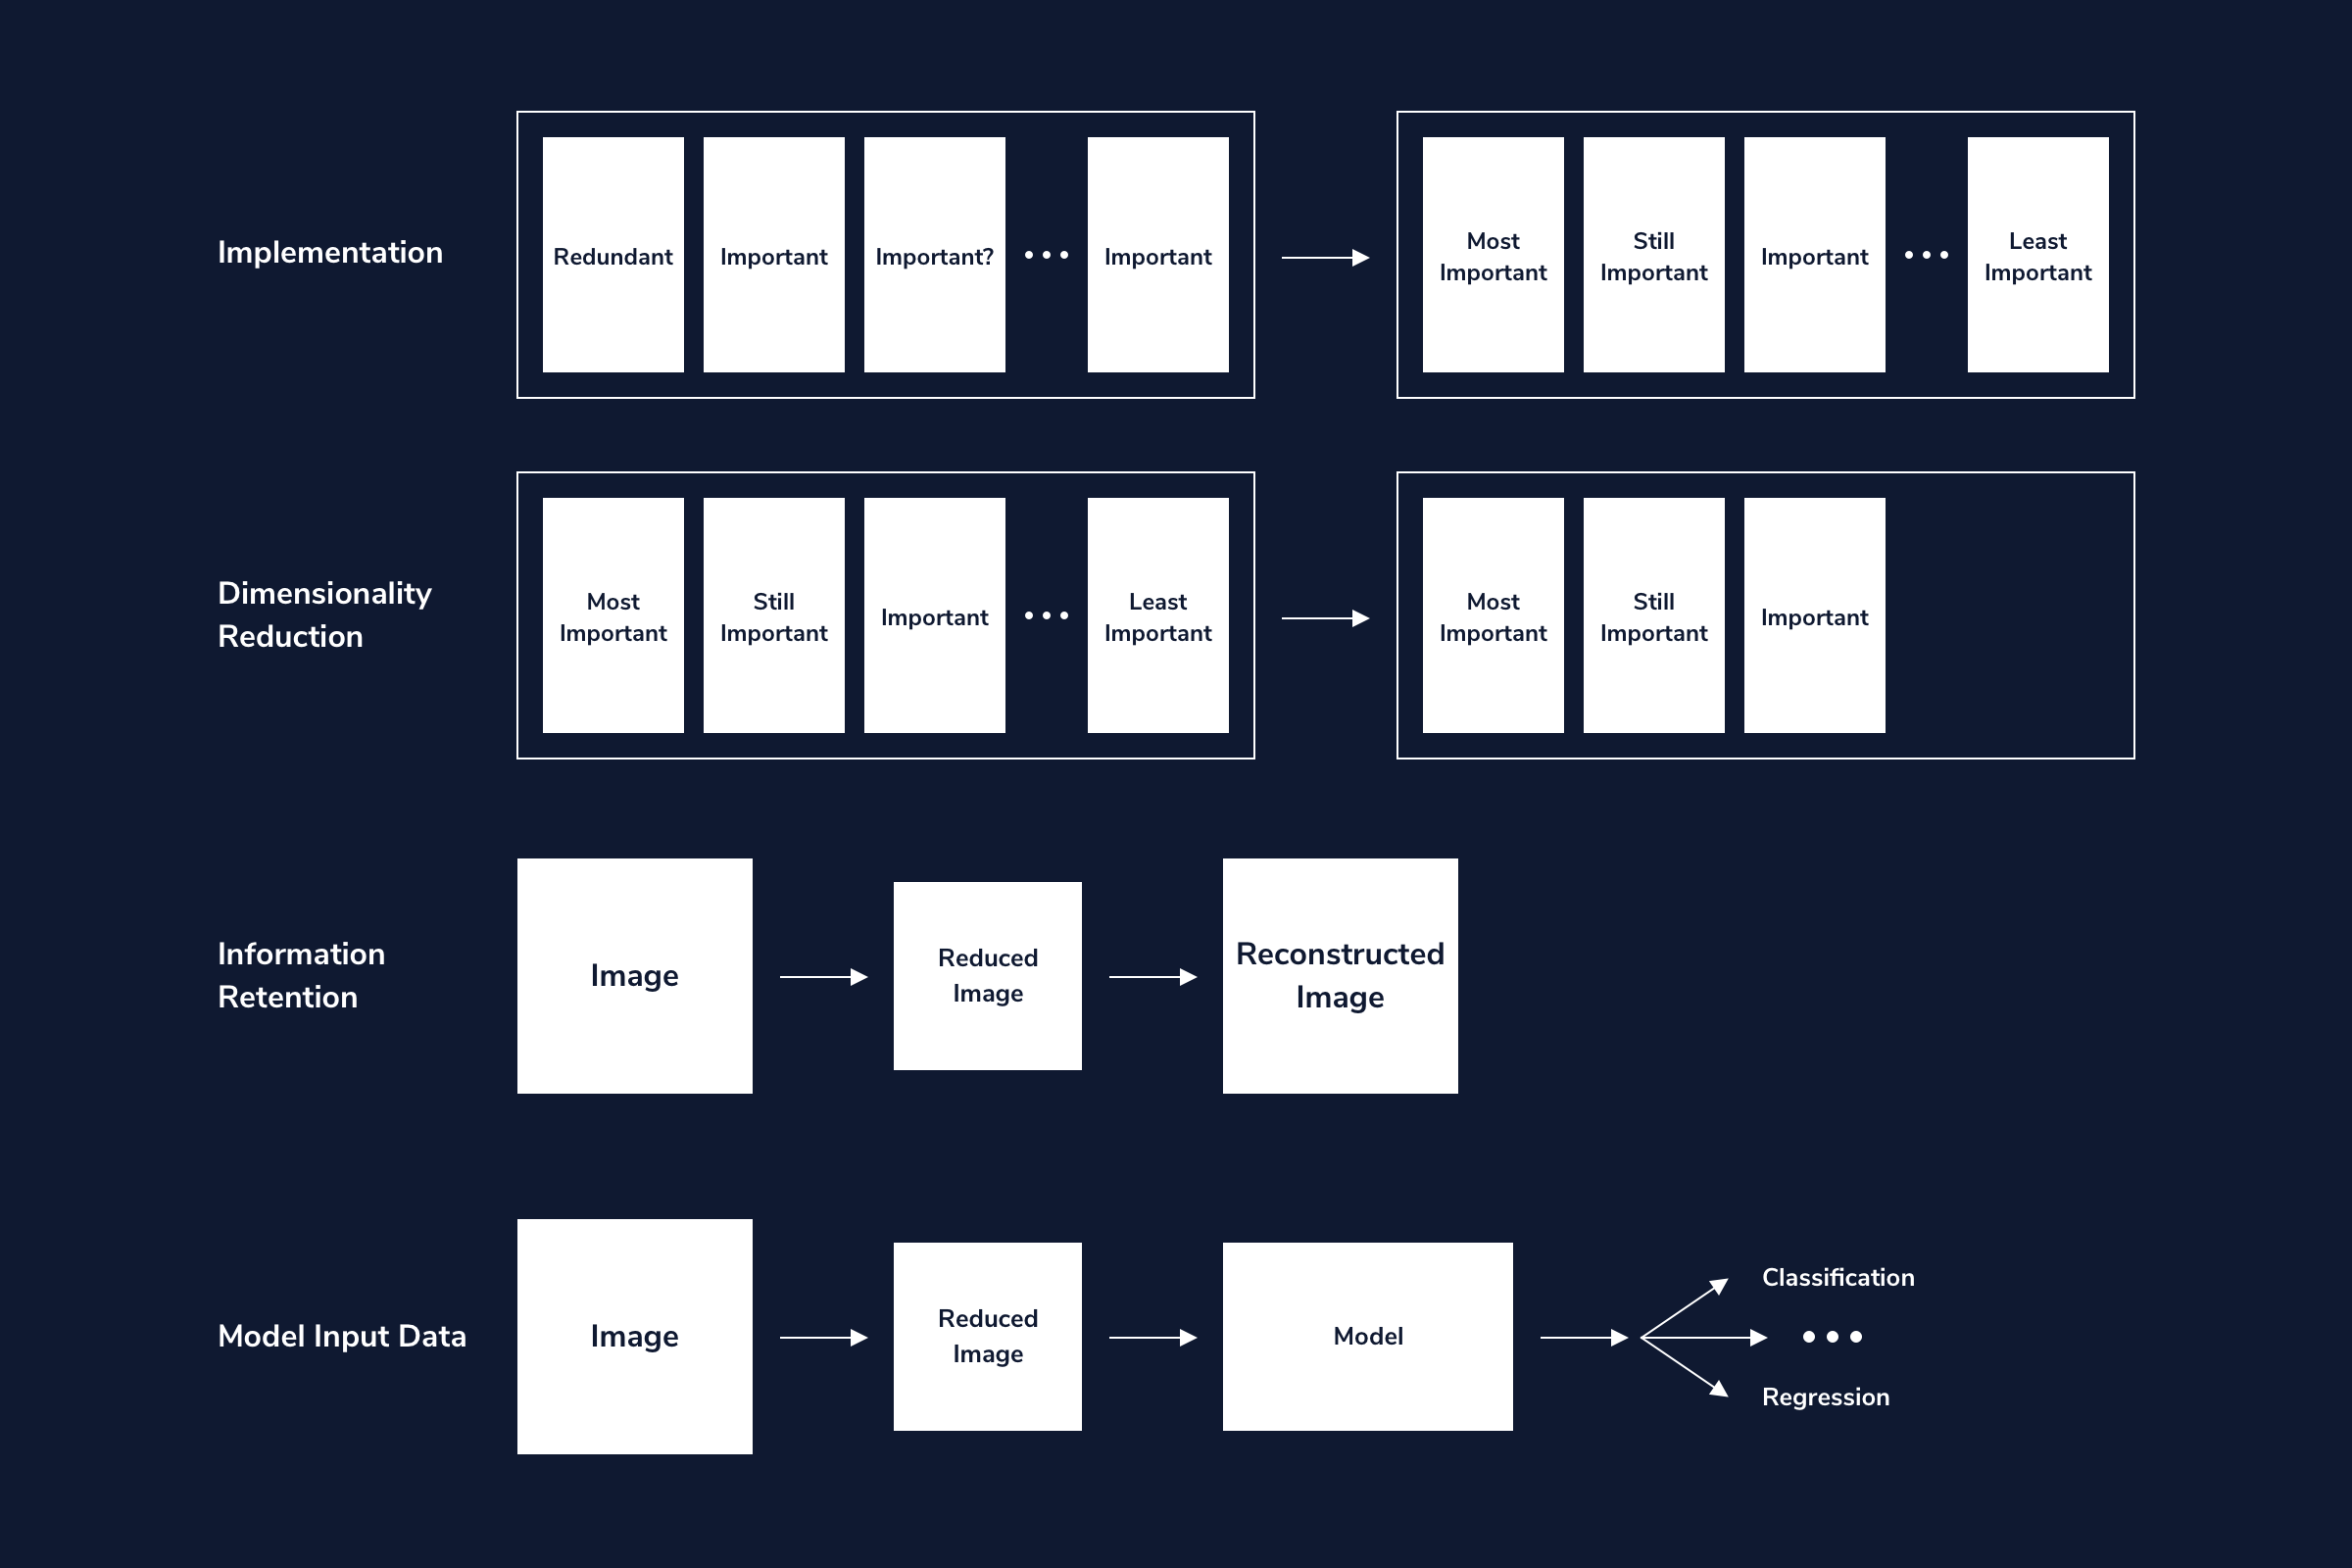

For a given dataset, we start by calculating a covariance matrix for all of our features.

Afterwards, we perform matrix factorization, which will separate out the dataset and give us two results:
  1) eigenvectors, also known as Principal Components, which define the direction, or "rotation", of our new data space
  2) eigenvalues, which determine the magnitude of that new data space


PCA allows for dimension reduction to any number of dimensions. 2 dimensions is the most common, as it allows for standard plotting techniques, but it does not restrict that capability.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

data_matrix = pd.read_csv('./data_matrix.csv')

# 1. Standardize the data matrix
# This is done by subtracting the mean and dividing by the standard deviation of each column vector.
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd
print(data_matrix_standardized.head())

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840718  -1.143277        -1.306550        -0.631130     -1.564995   
1 -0.829157  -1.013887        -1.395860        -0.434429     -1.969712   
2 -0.807128  -1.078789        -1.252311        -0.585713     -1.514236   
3 -0.785712  -0.977179        -1.278778        -0.439274     -1.741554   
4 -0.781210  -1.097344        -1.380420        -0.266654     -2.117915   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185640   -0.841420      -1.063302  0.289077  0.367600   1.423815   
1     -3.685904   -0.826071      -1.044178  0.697451 -0.462889   0.231046   
2     -2.045261   -0.808674      -1.008047  0.578174  0.518398   1.252819   
3     -2.742110   -0.773947      -0.973301  0.671235 -2.241685   0.515030   
4     -4.534862   -0.784257      -0.966044  0.476003  0.804743   1.874924   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     1.839049     

In [ ]:
# 2. Find the principal components
# Perform eigendecomposition by fitting the standardized data. 
# We can access the eigenvectors using the components_ attribute 
# and the proportional sizes of the eigenvalues using the explained_variance_ratio_ attribute.
pca = PCA()
components =  pca.fit(data_matrix_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
print(components)

                       0         1         2         3         4         5   \
Area             0.282458  0.245882 -0.061447 -0.031546 -0.091326  0.366390   
Perimeter        0.310891  0.179303 -0.018853 -0.042468  0.081820  0.010251   
MajorAxisLength  0.325824  0.100757 -0.084692 -0.006793 -0.044216  0.014909   
MinorAxisLength  0.236199  0.343461  0.007500 -0.061300 -0.004293  0.027882   
AspectRation     0.229298 -0.330844 -0.169058  0.053646 -0.024757 -0.075970   
Eccentricity     0.231526 -0.319434 -0.163042  0.118389 -0.060304  0.190428   
ConvexArea       0.283200  0.244630 -0.053649 -0.030960 -0.089113  0.369216   
EquivDiameter    0.297484  0.222802 -0.049914 -0.032427 -0.021953  0.033515   
Extent          -0.059808  0.220619 -0.085258  0.948254  0.197599 -0.000511   
Solidity        -0.143016  0.103322 -0.738670 -0.049546 -0.282194 -0.325693   
roundness       -0.248165  0.214805 -0.163325  0.067482 -0.648701  0.173439   
Compactness     -0.238378  0.328914  0.149701 -0.087

In [ ]:
# 3. Calculate the variance/info ratios
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

         0        1         2         3         4         5         6   \
0  0.554664  0.26431  0.080066  0.051141  0.027393  0.011498  0.006977   

         7         8         9         10        11        12            13  \
0  0.003251  0.000516  0.000091  0.000066  0.000018  0.000009  6.256417e-07   

             14            15  
0  1.341321e-07  1.115495e-07  


### Projecting the Data onto the principal Axes

Once we have performed PCA and obtained the eigenvectors, we can use them to project the data onto the first few principal axes. We can do this by taking the dot product of the data and eigenvectors, or by using the sklearn.decomposition.PCA module as follows:

In [ ]:
# 1. Transform the data into 4 new features using the first PCs
pca = PCA(n_components = 4)
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(data_pcomp.head())

        PC1       PC2       PC3       PC4
0 -4.981378  1.824630  0.748993 -0.390797
1 -5.436593  2.932257  2.182294 -0.431944
2 -4.757913  1.826817  0.514019 -0.125849
3 -4.300383  2.003587  3.554316  0.082961
4 -6.349107  4.088055  1.179156 -0.830327


In [ ]:
## 2. Plot the first two principal components colored by the bean classes

data_pcomp['bean_classes'] = classes
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='bean_classes', fit_reg=False)
plt.show()

### PCA as Features

So far we have used PCA to find principal axes and project the data onto them. We can use a subset of the projected data for modeling, while retaining most of the information in the original (and higher-dimensional) dataset.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
 
classes = pd.read_csv('./classes.csv')
 
# We will use the classes as y
y = classes.Class.astype('category').cat.codes
 
# Get principal components with 4 features and save as X
# Transform the original data by projecting it onto the first four principal axes. 
# We chose four PCs because we previously found that they contain 95% of the variance in the original data
pca_1 = PCA(n_components=4) 
X = pca_1.fit_transform(data_matrix_standardized) 
 
# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Use the transformed training data to fit an SVM model
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
# Print out the average likelihood score for the testing data
print(f'Score for model with 4 PCA features: {score_1}')
 
# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)
 
# Fit the same SVM model on the training set with all 16 features
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate an average likelihood score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')

# Notice that the score for the model using the first 4 principal components is higher than for 
# the model that was fit with the 16 original features. 
# We only needed 1/4 of the data to get even better model performance!

c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Score for model with 4 PCA features: 0.847506678539626
Score for model with original features: 0.9169634906500446


c:\Users\alan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


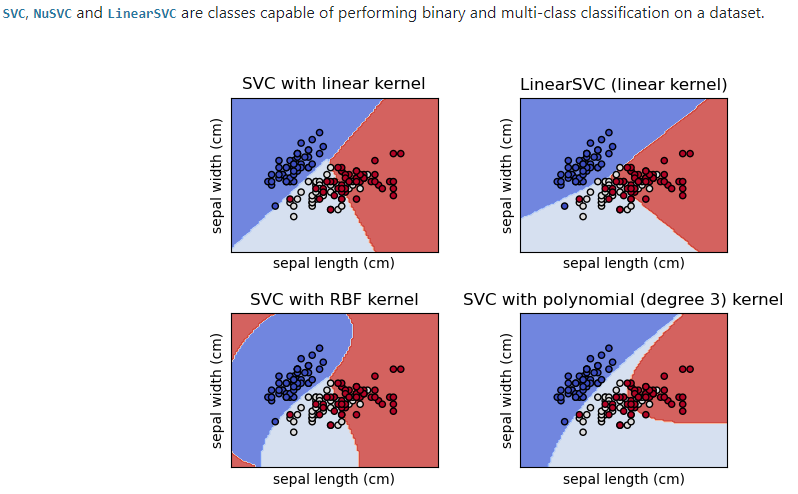

## PCA for Images I

Another way to show the inner workings of PCA is to use an image dataset. An image can be represented as a row in a data matrix, where each feature corresponds to the intensity of a pixel.

In this and the following exercise, we will be using the Olivetti Faces image dataset. We will begin by standardizing the images, and then observing the images of faces themselves.

Number of features(pixels) per image: 4096
Square image side length: 64


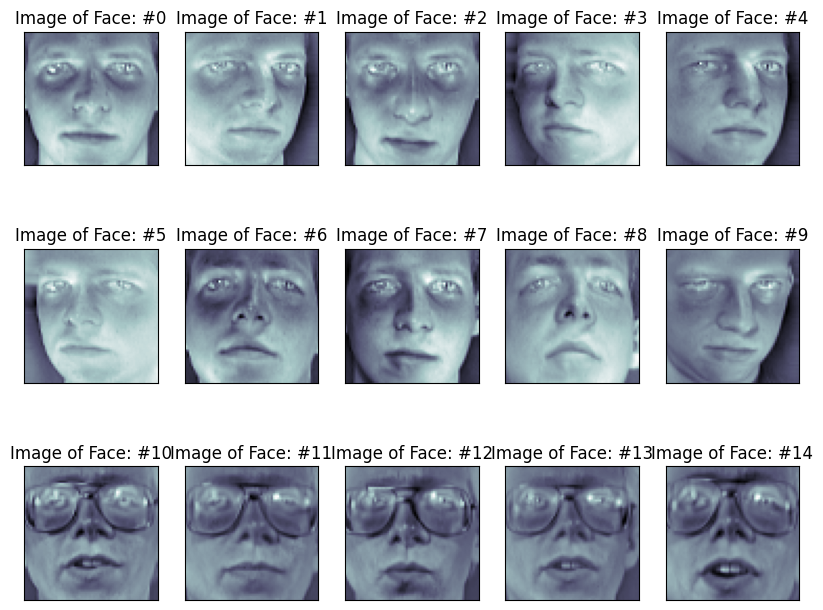

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
 
 
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']
 
# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std
 
 
# 2. Find the side length of a square image
n_images, n_features = faces_standardized.shape
side_length = int((n_features)**0.5)
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')
 
 
# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))

# Observe the first 15 images.
for i in range(15):

    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')

    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]

    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()

Now that we have cleaned up the data, we can perform PCA to retrieve the eigenvalues and eigenvectors.

This can be useful in understanding how PCA works! We can visualize the eigenvectors by plotting them. They actually have a name: eigenfaces. The eigenfaces are the building blocks for all the other faces in the data.

We can also visualize the dimensionality reduction that occurs when we transform the original data using a smaller number of principal components. In the code editor, we’ve provided you with code to:

Plot the eigenfaces
Plot the reconstructed faces using a smaller number of transformed features. To start, we’ve used 400 principal components — only 0.9% of the original number of features (pixels)!

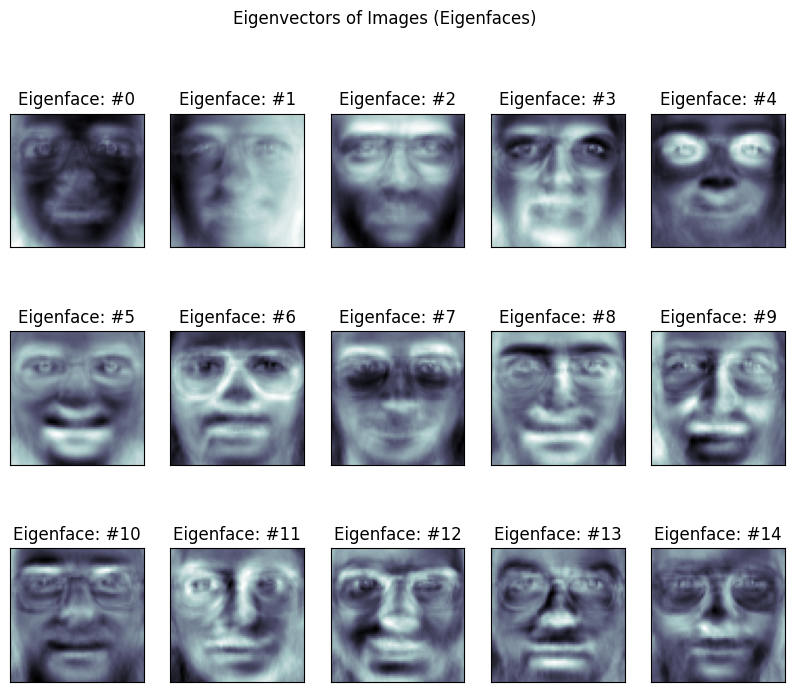

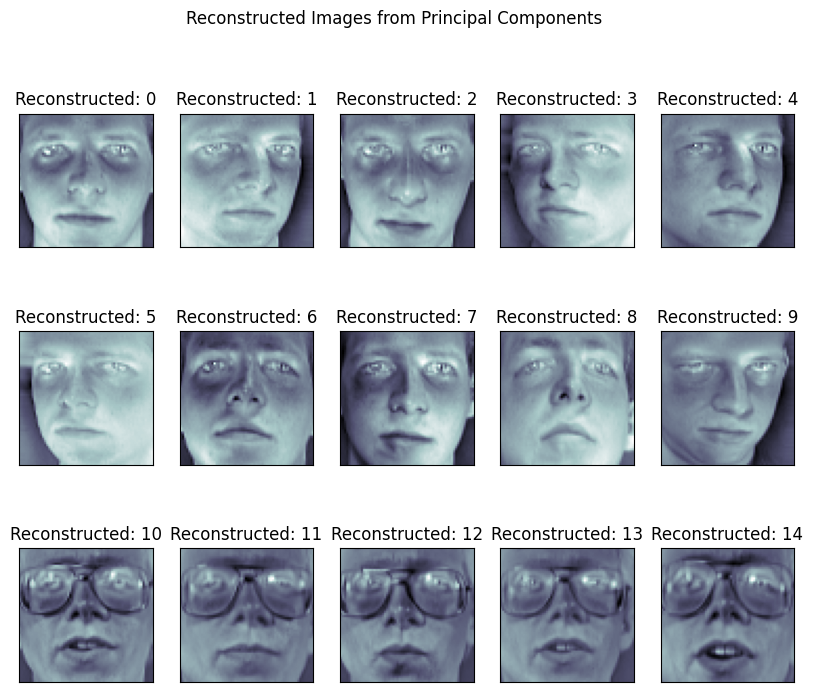

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=400) 
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()


2.
Now, change the number of components to 40 instead of 400 and press “Run”. Scroll down to view the reconstructed faces. Notice how we get a decent reconstruction, but lose some detail and clarity by reducing the feature space this much (only 0.09% of the original).

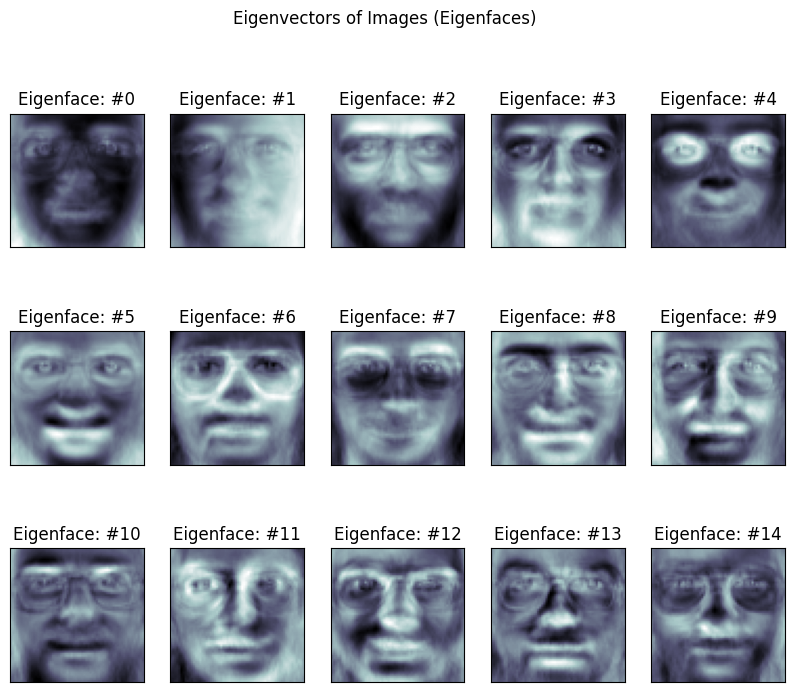

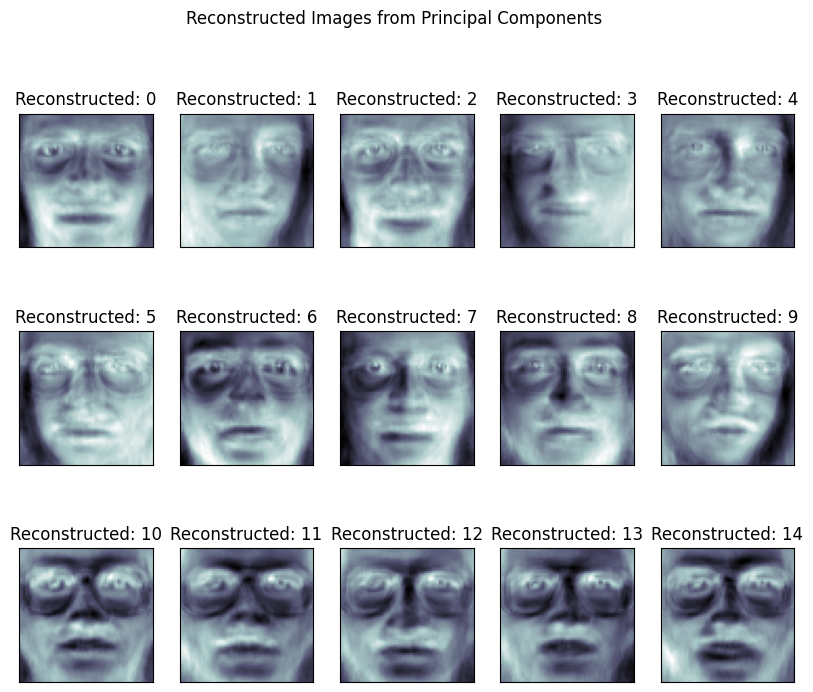

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=40) 
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()

In this lesson, we have seen how PCA can be implemented using NumPy and scikit-learn. In particular, we have seen how:

- Implementation: scikit-learn provides a more in-depth set of methods and attributes that extend the number of ways to perform PCA or display the percentage of variance for each principal axis.
- Dimensionality reduction: We visualized the data projected onto the principal axes, known as principal components.
- Image classification: We performed PCA on images of faces to visually understand how principal components still retain nearly all the information in the original dataset.
- Improved algorithmic speed/accuracy: Using principal components as input to a classifier, we observed how we could achieve equal or better results with lower dimensional data. Having lower dimensionality also speeds the training.